**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Loading Datset **

In [4]:
# Load the dataset
df = pd.read_csv("DatasetLinns.csv")
# Display the first few rows of the dataset
df.head()
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

               ID   Price ($)  Value for Money  Year of Launch  \
count  100.000000  100.000000       100.000000      100.000000   
mean    50.500000   29.670900         2.971000     2021.440000   
std     29.011492    6.328447         1.167774        1.771377   
min      1.000000   20.110000         1.100000     2019.000000   
25%     25.750000   23.915000         2.000000     2020.000000   
50%     50.500000   29.450000         2.900000     2021.500000   
75%     75.250000   35.685000         4.025000     2023.000000   
max    100.000000   39.740000         4.900000     2024.000000   

       Total Users (millions)  Total Sales (millions)  
count              100.000000              100.000000  
mean                52.320000               44.950000  
std                 26.145622               20.048615  
min                 10.000000               11.000000  
25%                 28.750000               27.750000  
50%                 51.000000               45.000000  
75%          

**Visualising the dataset**

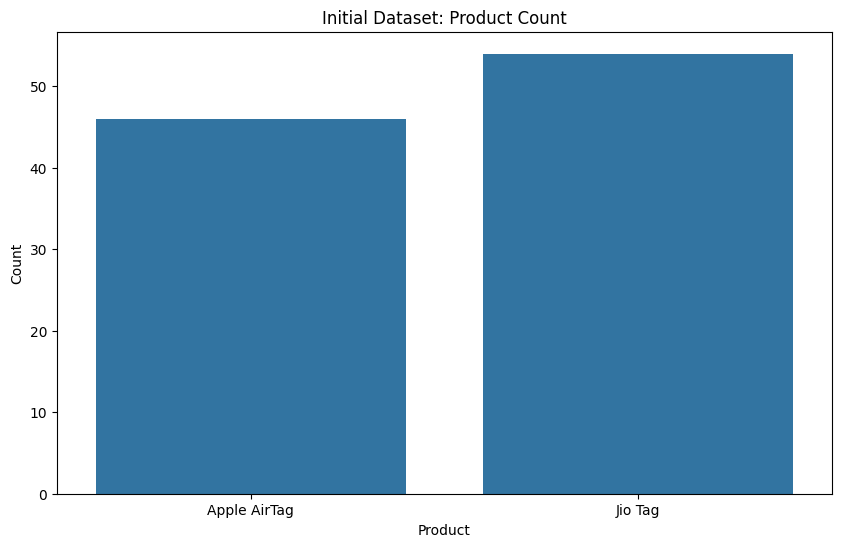

In [11]:
#visualize dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product')
plt.title('Initial Dataset: Product Count')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

***Preprocessing***

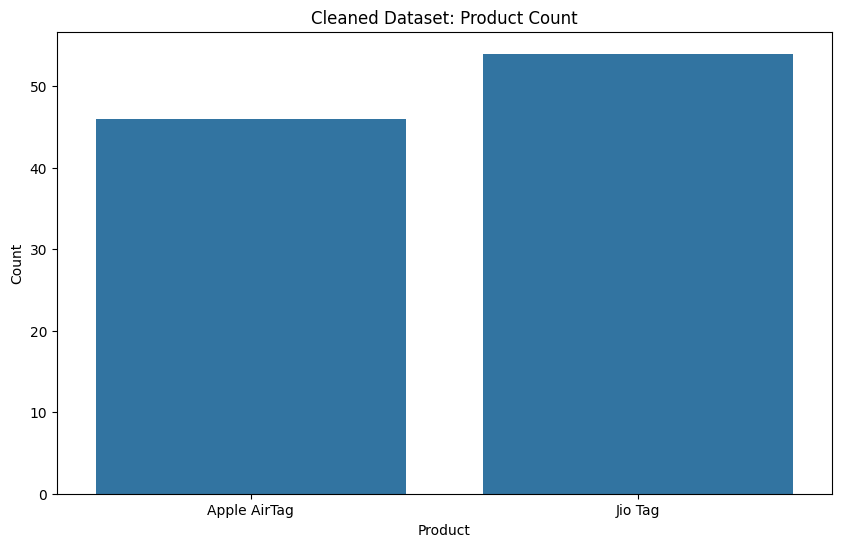

In [12]:
#  Remove duplicate rows and visualize the cleaned dataset
df_cleaned = df.drop_duplicates()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Product')
plt.title('Cleaned Dataset: Product Count')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

** Generate Hypothetical Actual and Predicted Values for Demonstration**

In [13]:
#Generate hypothetical actual and predicted values for demonstration
np.random.seed(42)  # For reproducibility
df_cleaned['Actual'] = np.random.choice([0, 1], size=len(df_cleaned))  # Actual values (0 or 1)
df_cleaned['Predicted'] = np.random.choice([0, 1], size=len(df_cleaned))  # Predicted values (0 or 1)


 **Prepare Features and Target, Train Logistic Regression Model, and Visualize Distribution**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


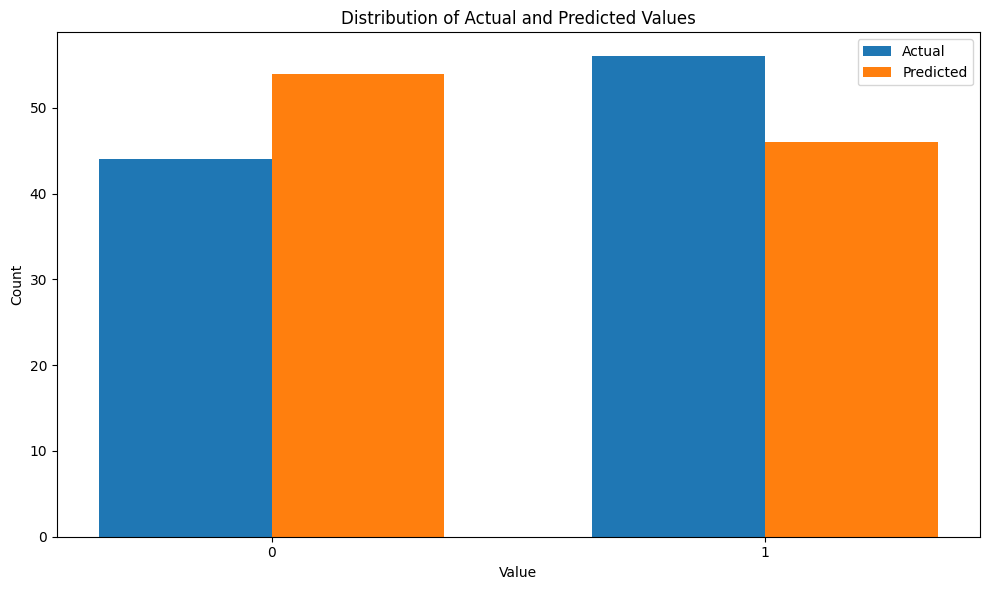

In [14]:
# Prepare the features and target
X = df_cleaned.drop(columns=['Actual', 'Predicted'], errors='ignore')
y = df_cleaned['Actual']

# Convert categorical columns to numerical
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Append predictions to the cleaned DataFrame
df_cleaned.loc[y_test.index, 'Predicted'] = y_pred

# Visualize the distribution of Actual and Predicted values together
plt.figure(figsize=(10, 6))

# Subplot 1: Distribution of Actual and Predicted values side by side
bar_width = 0.35
index = np.arange(2)

actual_counts = df_cleaned['Actual'].value_counts().sort_index()
predicted_counts = df_cleaned['Predicted'].value_counts().sort_index()

plt.bar(index, actual_counts, bar_width, label='Actual')
plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Actual and Predicted Values')
plt.xticks(index + bar_width / 2, ('0', '1'))
plt.legend()

plt.tight_layout()
plt.show()


**Accuracy**

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.55


In [16]:
# Save the cleaned dataset
cleaned_csv_file_path = "datasetLinn.csv"
df_cleaned.to_csv(cleaned_csv_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_csv_file_path}")

Cleaned dataset saved to datasetLinn.csv


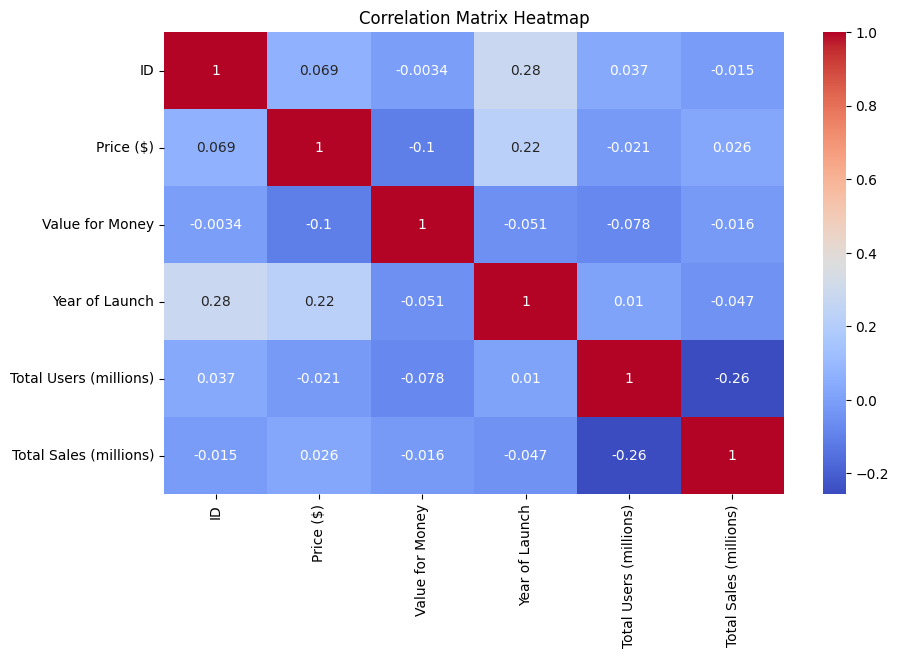

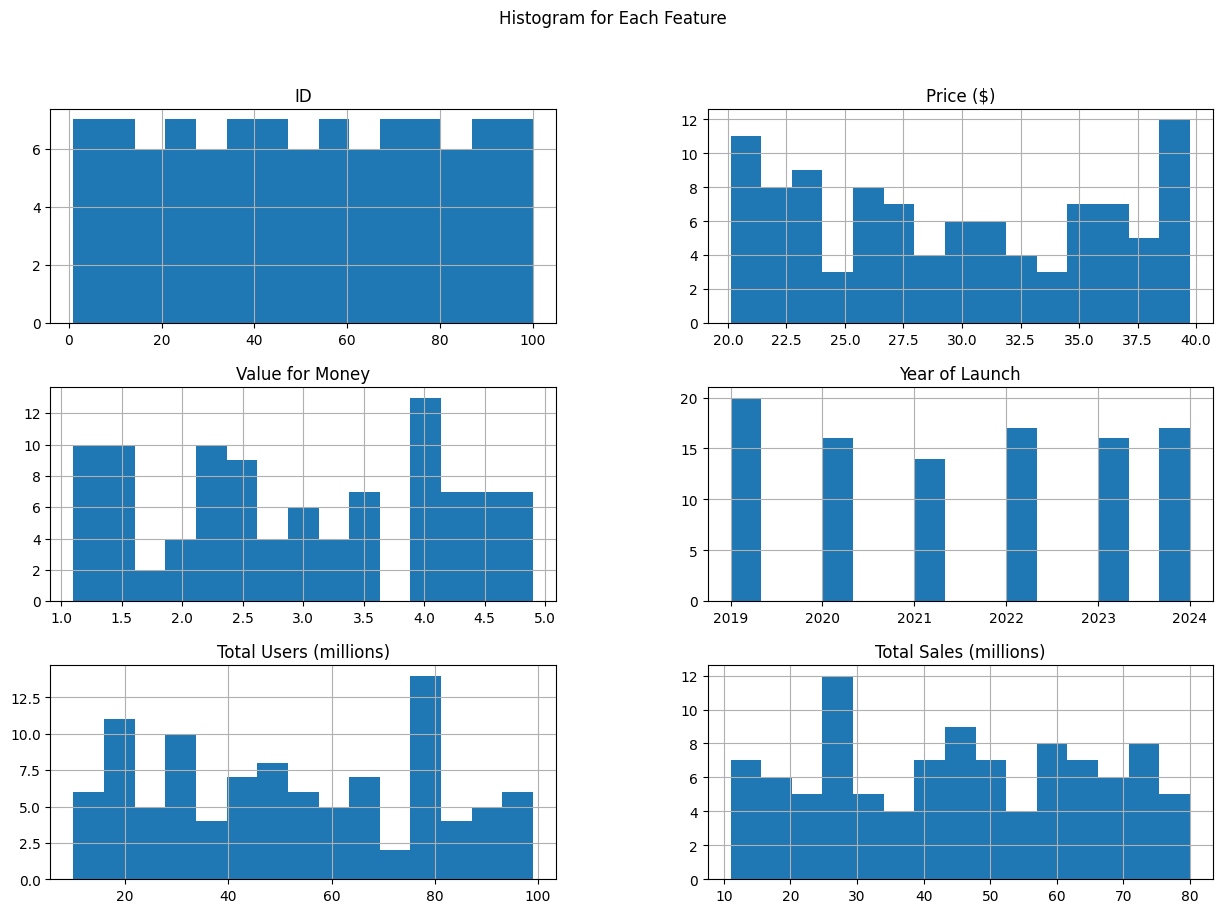

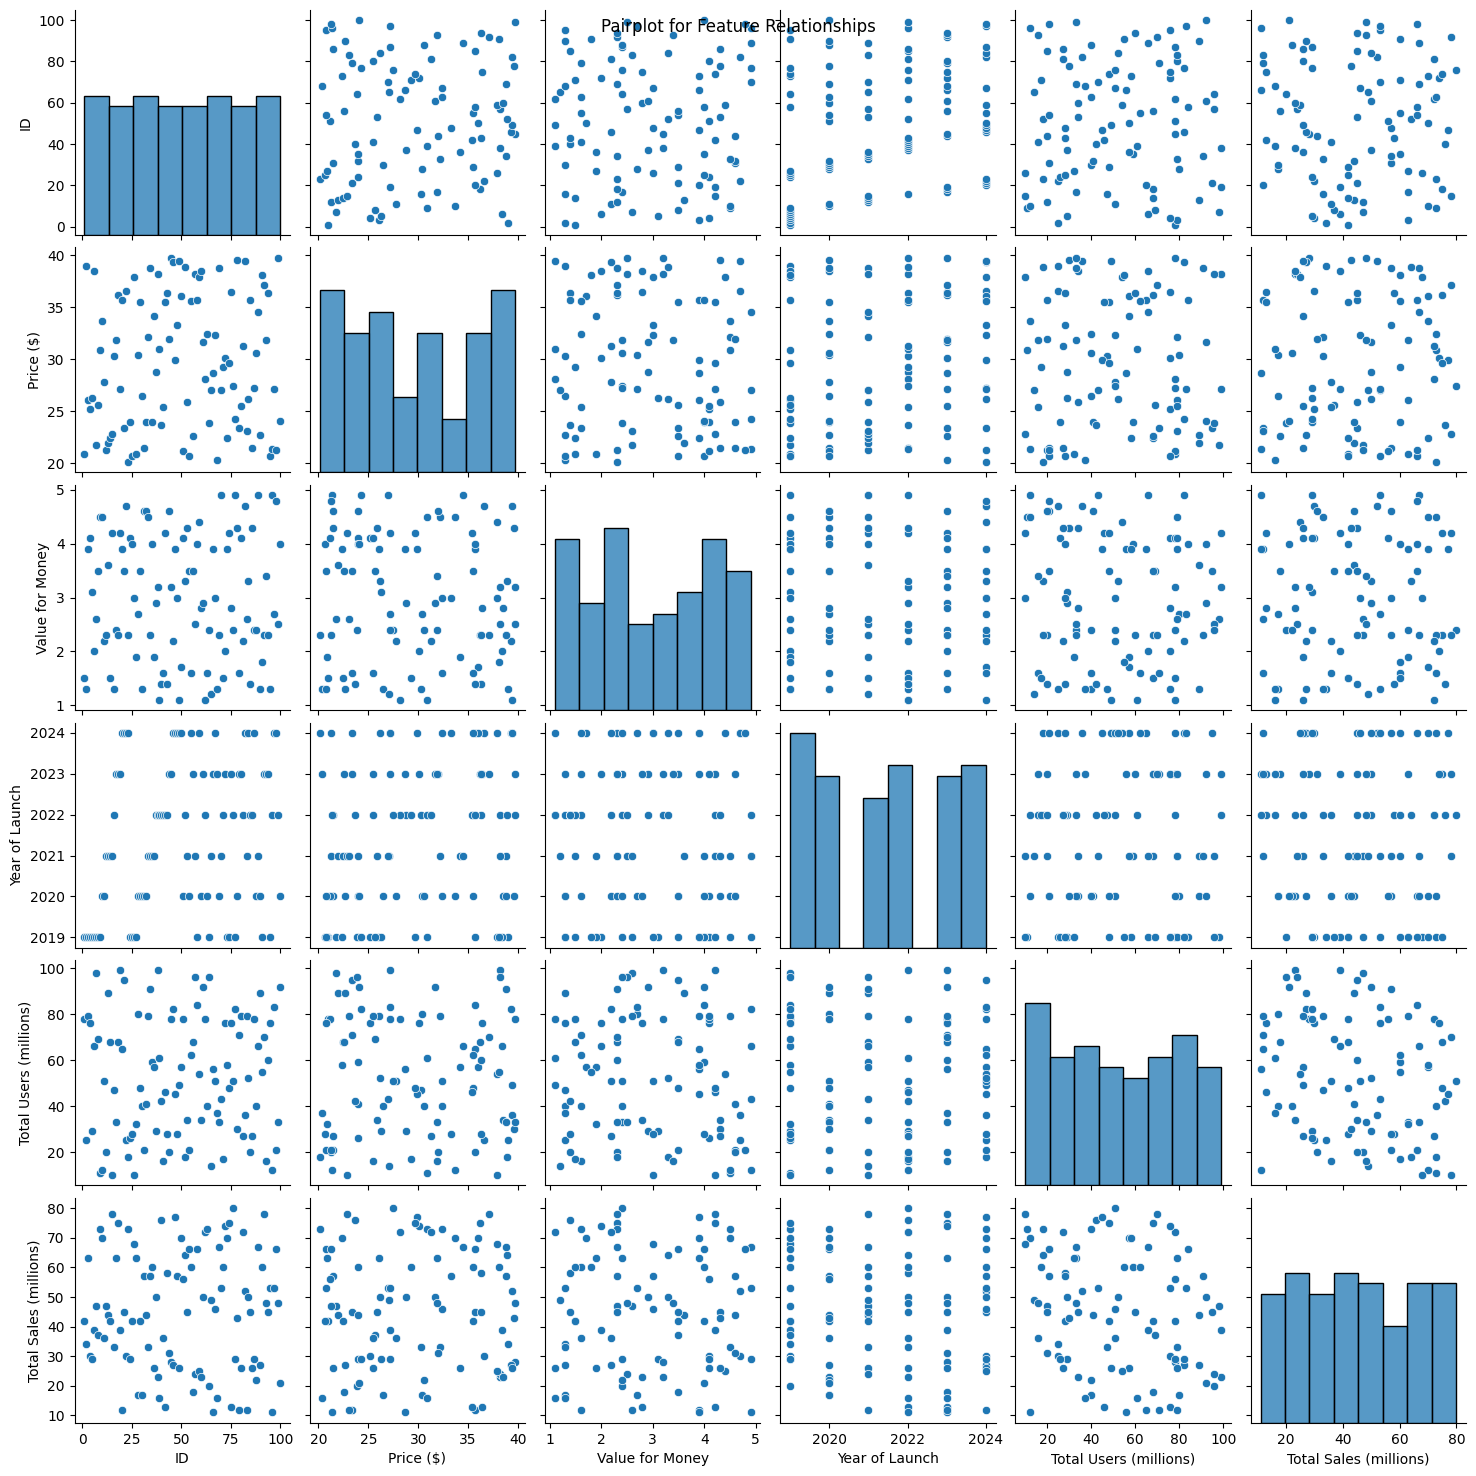

In [17]:
# Filter the dataset to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check if the dataframe has numeric columns
if not numeric_df.empty:
    # Correlation matrix heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation matrix.")


# Histogram for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogram for Each Feature")
plt.show()

# Pairplot for feature relationships
sns.pairplot(df)
plt.suptitle("Pairplot for Feature Relationships")
plt.show()


**Predict a Percentage of Success if the Product is Made with Indian Raw Materials **


In [22]:
# Modify the input data (X_new) to simulate using Indian raw materials
X_new = X_test.copy()

# Adjust the 'Price ($)' column to reflect cheaper materials
X_new['Price ($)'] = X_new['Price ($)'] * 0.7  # Assuming a 30% cost reduction

# Predict the success probability on the modified data
success_prob = model.predict_proba(X_new)[:, 1]  # Probability of success (assuming positive class)
average_success_prob = np.mean(success_prob) * 100  # Calculate average success probability
print(f"Predicted Average Success Probability with Indian Raw Materials: {average_success_prob:.2f}%")


Predicted Average Success Probability with Indian Raw Materials: 45.14%


In [23]:
# Predict Accuracy for the Original Dataset
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Original Test Data: {accuracy:.2f}")

# Predict Accuracy with Indian Raw Materials
y_pred_new = model.predict(X_new)
new_accuracy = accuracy_score(y_test, y_pred_new)
print(f"Model Accuracy with Indian Raw Materials: {new_accuracy:.2f}")

Model Accuracy on Original Test Data: 0.55
Model Accuracy with Indian Raw Materials: 0.50
